In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('googleplaystore.csv')
df = df.reset_index()
df

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,percent_missing
Rating,13.60
Current Ver,0.07
Android Ver,0.03
Type,0.01
Content Rating,0.01
index,0.00
App,0.00
Category,0.00
Reviews,0.00
Size,0.00


In [4]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

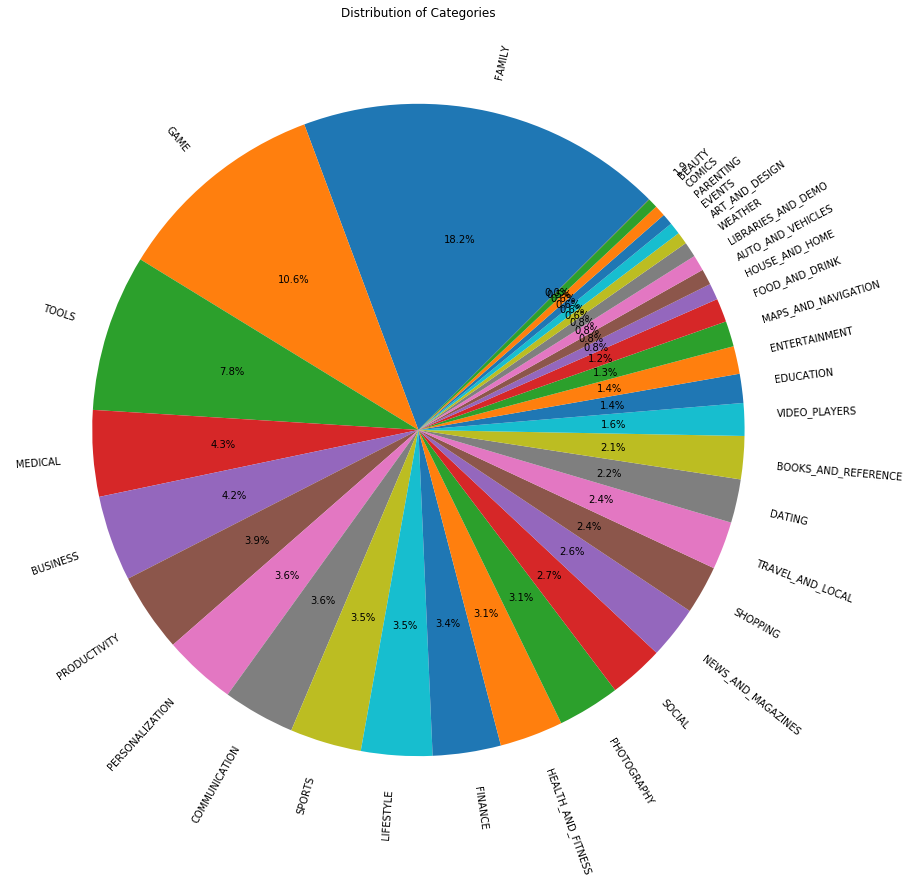

In [5]:
category_count  = df['Category'].value_counts();
plt.figure(figsize = (15,15))
plt.pie(category_count.values, labels = category_count.index, autopct = '%.1f%%', rotatelabels = True, startangle = 45.0)
plt.title('Distribution of Categories')
plt.show()

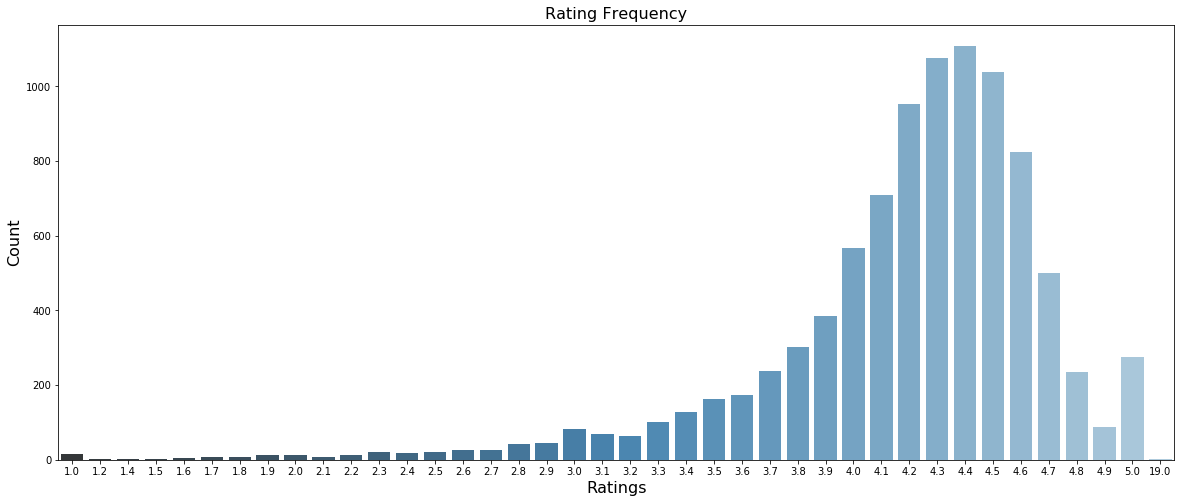

In [6]:
rating_count = df['Rating'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(rating_count.index, rating_count.values, palette="Blues_d");
plt.ylabel('Count', fontsize=16)
plt.xlabel('Ratings', fontsize=16)
plt.title("Rating Frequency", fontsize=16);

In [7]:
df[df['Content Rating'].isnull()]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Observing Category and missing data percentage, we observe '1.9' in category and Nan in Content Rating. Further exploring Content Rating, we observe its the same entry with '1.9' as category
Since Current version varies a lot on developer choice, we will drop it as well drop android version.

In [8]:
i = df[df['Content Rating'].isnull()].index
df = df.drop(i)

In [9]:
df[df['Type'].isnull()]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [10]:
i = df[df['Type'].isnull()].index
df = df.drop(i)

In [56]:
data = df.drop('Current Ver',axis=1)
data = data.drop('Android Ver',axis=1)

In [57]:
le = preprocessing.LabelEncoder()
data['App'] = le.fit_transform(data['App'])

In [58]:
#category_list = data['Category'].unique().tolist() 
#category_list = ['cat_' + word for word in category_list]
#data = pd.concat([data, pd.get_dummies(data['Category'], prefix='cat')], axis=1)

In [59]:
x=tuple(data['Category'].unique())
d={}
for i,j in enumerate(x):
    #print(i,j)
    d.update({j:(i+1)})
#print(d)
data['Category'] = data['Category'].map(d)

In [60]:
le = preprocessing.LabelEncoder()
data['Genres'] = le.fit_transform(data['Genres'])

In [61]:
le = preprocessing.LabelEncoder()
data['Content Rating'] = le.fit_transform(data['Content Rating'])

In [62]:
data['Price'] = pd.to_numeric(data['Price'].apply(lambda x : x.strip('$')))
data['Installs'] = pd.to_numeric(data['Installs'].apply(lambda x : x.strip('+').replace(',', '')))

In [63]:
data['Type'] = pd.get_dummies(data['Type'])
data['Size'] = data['Size'].apply(lambda x: x.strip('M').strip('k'))

In [64]:
data['Last Updated']=pd.to_datetime(data['Last Updated'],infer_datetime_format=True)

In [65]:
df_t = data

In [67]:
df_t['Size'] = (pd.to_numeric(df_t['Size'], errors='coerce'))

In [68]:
size = df_t.groupby('Category').median()['Size']

In [69]:
i = df_t[df_t['Size'].isnull()].index
i

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10647, 10679, 10681, 10707, 10712, 10713, 10725, 10765, 10826,
            10839],
           dtype='int64', length=1694)

In [70]:
for indx in i:
    #df_t = df_t.replace({'Size':indx}, size[df_t[df_t['index']==indx]['Category']])
    df_t['Size'][indx] = size[df_t[df_t['index']==indx]['Category']]

/anaconda2/envs/jupyterlab/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_t

Replaced the missing size with median size of the same Category.

In [71]:
i = df_t[df_t['Rating'].isnull()].index
i

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1473)

In [72]:
df_t['Rating'] = pd.to_numeric(df_t['Rating'])

In [73]:
rating = df_t.groupby('Category').median()['Rating']

In [75]:
for indx in i:
    #df_t = df_t.replace({'Size':indx}, size[df_t[df_t['index']==indx]['Category']])
    df_t['Rating'][indx] = rating[df_t[df_t['index']==indx]['Category']]

/anaconda2/envs/jupyterlab/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_t

In [76]:
dropset = ['index']
df_t = df_t.drop(dropset,axis=1)

In [77]:
df_t['Reviews'] = pd.to_numeric(df_t['Reviews'])

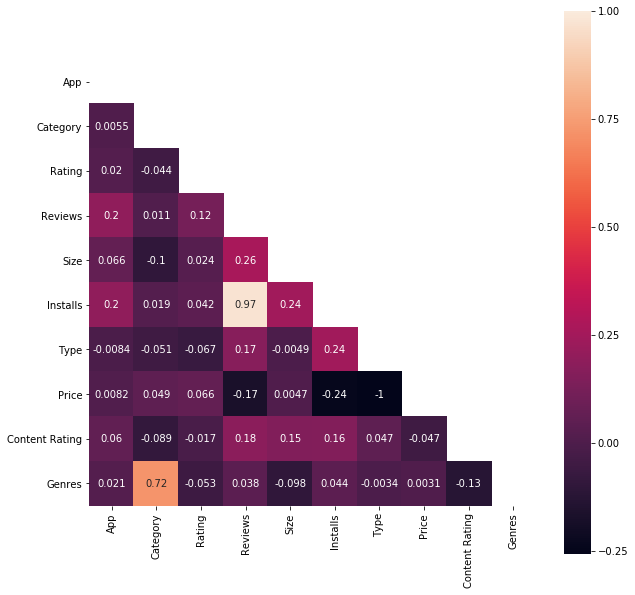

In [78]:
mask = np.zeros_like(df_t.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(df_t.corr(method = 'spearman', min_periods = 5), mask=mask,square=True, annot=True,robust=True, yticklabels=1)

As we can observer a very high correlation between Reviews and Installs, we will exploit this fact to analyse App Store dataset. (Codependence)

In [123]:
def grubbs_test(data):
    import math
    a = 0.05
    N = data.shape[0]
    #print(N)
    p = 1-(a/(2*N))
    nn = N-2
    value = stats.t.ppf(p, nn)
    #print(value)
    value**=2
    #print(value)
    thresh = math.sqrt(value/(nn*value)) * (N-1)/math.sqrt(N)
    #print(thresh)
    y = data

    term_factor_max = 0
    term_factor_min = 0
    mean = y.mean()
    std = y.std()
    mean_dev = abs(y-mean)
    for i in range(N):

        y_max = mean_dev.idxmax()
        y_min = mean_dev.idxmin()
        if y_max == term_factor_max and y_min == term_factor_min:
            break
        term_factor_max = y_max
        term_factor_min = y_min
        G1 = abs(mean_dev[y_min])/std
        G2 = abs(mean_dev[y_max])/std
        if G1>thresh:
            mean_dev = mean_dev[mean_dev != mean_dev[y_min]]
            y = y[y != y[y_min]]
            #print('min',y_min)
        if G2>thresh:
            mean_dev = mean_dev[mean_dev != mean_dev[y_max]]
            y = y[y != y[y_max]]
            #print('max',y_max)
        #print(i, thresh, G1, y[y_min], G2, y[y_max])
    p = stats.t.cdf(value, nn)
    return y

In [124]:
y = grubbs_test(df_t['Reviews'])
print((df_t['Reviews'].shape[0]-y.shape[0])/df_t['Reviews'].shape[0]*100)

2.9523018728665007


In [81]:
def boxplot_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    iqr = stats.iqr(data)#IQR(data)
    data = data[(data>(Q1-1.5*iqr)) & (data<(Q3+1.5*iqr))]
    return data

In [82]:
y = boxplot_outlier(df_t['Reviews'])
print((df_t['Reviews'].shape[0]-y.shape[0])/df_t['Reviews'].shape[0]*100)

17.750715010609834


4.3    748
5.0    232
4.2    230
4.4    137
4.5    123
4.1     41
4.8     39
4.0     36
4.6     35
4.7     30
3.0     24
4.9     18
1.0     13
3.7     12
3.8     11
3.4     10
3.6      8
3.5      8
3.9      7
3.3      6
2.8      4
2.7      4
3.2      4
2.3      3
1.7      3
2.4      3
2.9      3
2.6      2
1.5      2
2.0      2
2.2      2
3.1      1
2.5      1
1.8      1
Name: Rating, dtype: int64

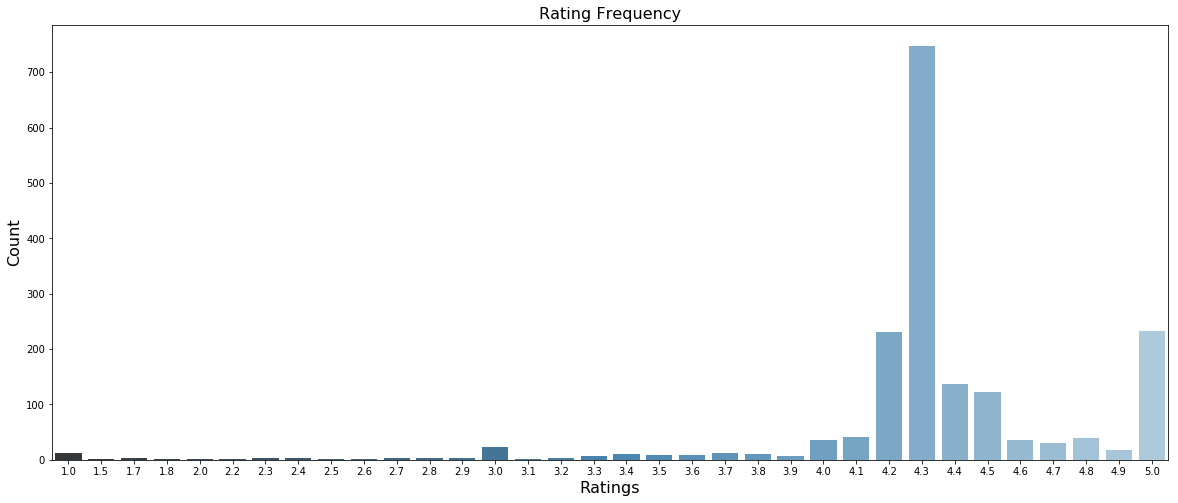

In [108]:
#install = df_t.groupby('Reviews')['Installs']
rev=(df_t[df_t['Installs']<1000]['Rating'])
rating_count = rev.value_counts()
plt.figure(figsize=(20,8))
sns.barplot(rating_count.index, rating_count.values, palette="Blues_d");
plt.ylabel('Count', fontsize=16)
plt.xlabel('Ratings', fontsize=16)
plt.title("Rating Frequency", fontsize=16);
max(rev)
rev.value_counts()